In [1]:
!git clone https://github.com/ultralytics/ultralytics
%cd yolov8

[WinError 2] The system cannot find the file specified: 'yolov8'
C:\Users\Eyad\Downloads\Cigarettes counter


fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [3]:
import torch
import os
from roboflow import Roboflow

In [1]:
for dirname, _, filenames in os.walk('C:/Users/Eyad/Downloads/Cigarettes counter/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Eyad/Downloads/Cigarettes counter/images\test_labels.csv
C:/Users/Eyad/Downloads/Cigarettes counter/images\train_labels.csv
C:/Users/Eyad/Downloads/Cigarettes counter/images\test\frame10014.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\test\frame10014.xml
C:/Users/Eyad/Downloads/Cigarettes counter/images\test\frame10020.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\test\frame10020.xml
C:/Users/Eyad/Downloads/Cigarettes counter/images\test\frame10026.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\test\frame10026.xml
C:/Users/Eyad/Downloads/Cigarettes counter/images\test\frame10032.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\test\frame10032.xml
C:/Users/Eyad/Downloads/Cigarettes counter/images\test\frame10038.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\test\frame10038.xml
C:/Users/Eyad/Downloads/Cigarettes counter/images\test\frame10104.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\test\frame10104.xml
C:/Users/Eyad/Downloads/Cig

C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame426.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame426.xml
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame4260.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame4260.xml
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame4266.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame4266.xml
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame4272.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame4272.xml
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame4278.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame4278.xml
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame4284.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame4284.xml
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame4290.jpg
C:/Users/Eyad/Downloads/Cigarettes counter/images\train\frame4290.xml
C:/Users/Eyad/Download

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import cv2
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from tensorflow import keras
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
import random
import pprint
import sys
import time
import numpy as np
from optparse import OptionParser
import pickle
import math
import cv2
import copy
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd
import os

from sklearn.metrics import average_precision_score

from keras import backend as K
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, TimeDistributed
from keras.utils.layer_utils import get_source_inputs
from tensorflow.python.keras.layers import Layer, InputSpec
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.losses import CategoricalCrossentropy
from keras.models import Model
from keras.utils import generic_utils
from keras.layers import InputSpec , Layer
from keras import initializers, regularizers
from skimage import io
from object_detection.utils import visualization_utils as vis_util
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
model_path = 'frcnn/saved_model'
model = tf.saved_model.load(model_path)

In [7]:
train = pd.read_csv("images\\train_labels.csv")
test = pd.read_csv("images\\test_labels.csv")

In [8]:
train

filename  width  height          class  xmin  ymin  xmax  \
0                  frame0.jpg   1000     800  CigaretteButt   573   458   646   
1              frame10002.jpg   1000     800  CigaretteButt   453   108   555   
2              frame10008.jpg   1000     800  CigaretteButt   456   137   544   
3               frame1002.jpg   1000     800  CigaretteButt   250   196   302   
4              frame10044.jpg   1000     800  CigaretteButt   301   220   358   
...                       ...    ...     ...            ...   ...   ...   ...   
2327  IMG_20200319_190753.jpg   1000     800  CigaretteButt   733   358   824   
2328  IMG_20200319_190756.jpg   1000     800  CigaretteButt   263   318   346   
2329  IMG_20200319_190759.jpg   1000     800  CigaretteButt   335   267   502   
2330  IMG_20200319_190822.jpg   1000     800  CigaretteButt   340   494   519   
2331  IMG_20200319_190826.jpg   1000     800  CigaretteButt   490   436   658   

      ymax  
0      589  
1      198  
2      220  
3      312  
4      320  
...    ...  
2327   494  
2328   447  
2329   416  
2330   550  
2331   486  

[2332 rows x 8 columns]

In [11]:
def creatingPath(x):
    return ("C:\\Users\\Eyad\\Downloads\\Cigarettes counter\\images\\train\\"+x)

train["path"] = train["filename"].apply(creatingPath)

In [12]:
def plot_bbox(img_id):
    img_url = train.loc[train["filename"]==img_id]['path'].values[0]
    img = io.imread(img_url)
    height, width, channel = img.shape
    print(f"Image: {img.shape}")
    bboxs = train[train['filename']==img_id]
    for index, row in bboxs.iterrows():
        xmin = row['xmin']
        xmax = row['xmax']
        ymin = row['ymin']
        ymax = row['ymax']
        #xmin = int(xmin*width)
        #xmax = int(xmax*width)
        #ymin = int(ymin*height)
        #ymax = int(ymax*height)
        label_name = row['class']
        class_series = train[train["class"]==label_name]
        class_name = class_series["class"].values[0]
        print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
        cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, class_name, (xmin,ymin-10), font, 1, (0,255,0), 5)
    plt.figure(figsize=(15,10))
    plt.title('Image with Bounding Box')
    plt.imshow(img)
    plt.axis("off")
    plt.show()

Image: (800, 1000, 3)
Coordinates: (570, 137), (764, 240)


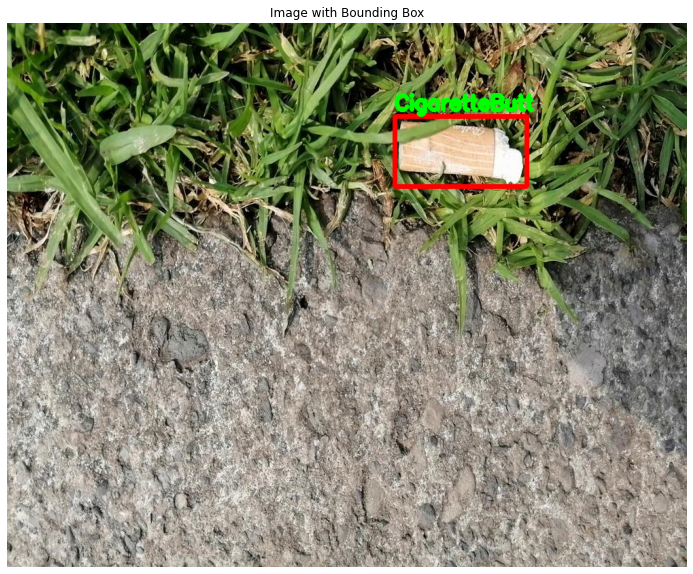

Image: (800, 1000, 3)
Coordinates: (267, 220), (390, 342)


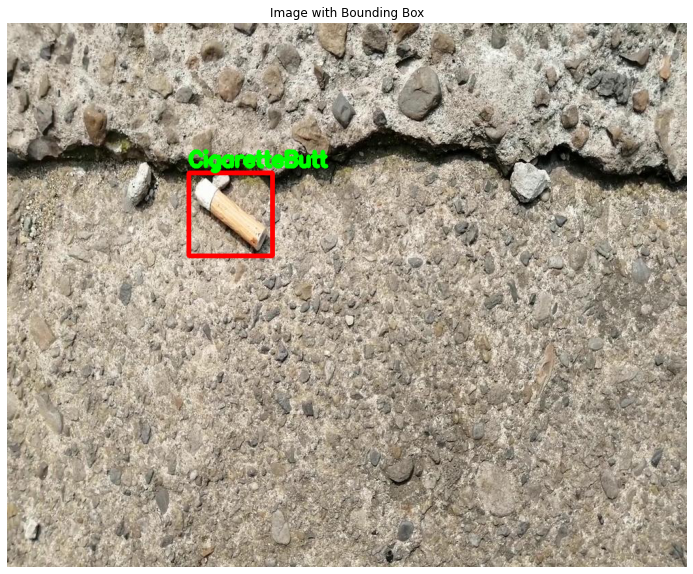

Image: (800, 1000, 3)
Coordinates: (603, 96), (801, 200)


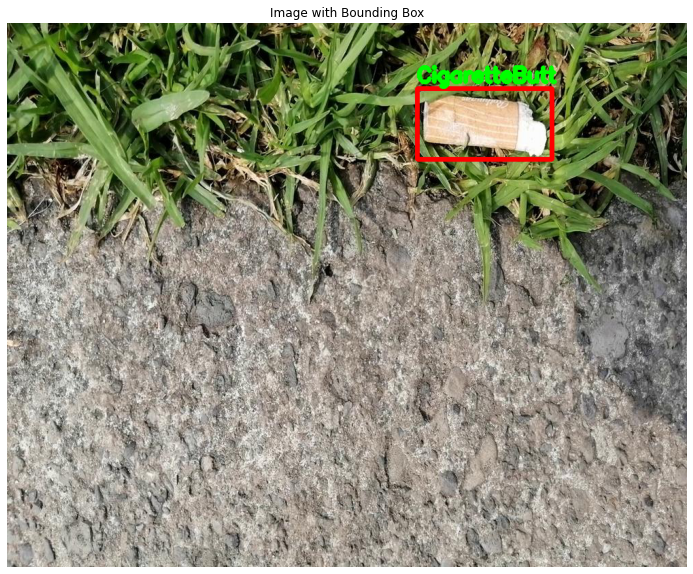

Image: (800, 1000, 3)
Coordinates: (492, 170), (622, 301)


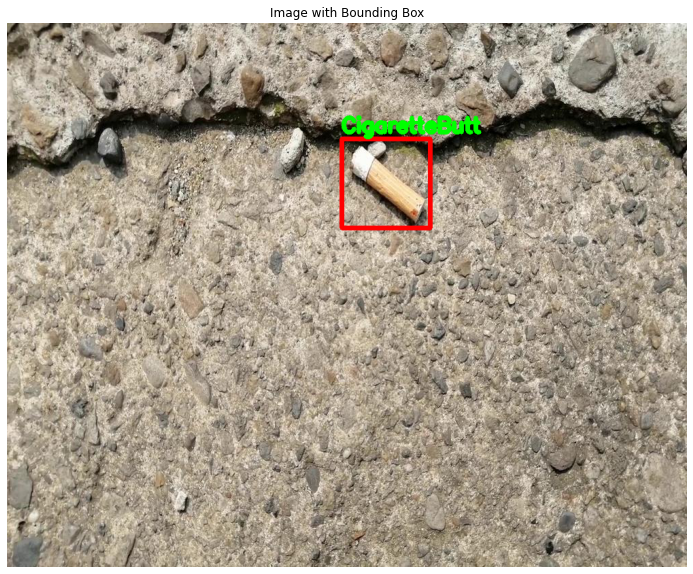

Image: (800, 1000, 3)
Coordinates: (433, 381), (545, 496)


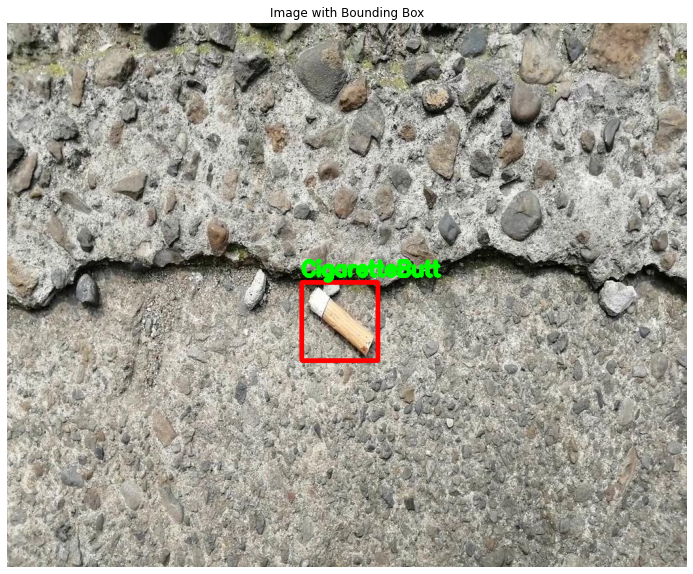

In [13]:
least_objects_img_ids = train["filename"].value_counts().tail(50).index.values
for img_id in random.sample(list(least_objects_img_ids), 5):
    plot_bbox(img_id)

In [44]:
# Preprocess and resize the image
image_path = 'c5.jpg'
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image, channels=3)
image = tf.image.convert_image_dtype(image, tf.uint8)
image = tf.expand_dims(image, axis=0)

# Run the image through the network
detections = model(image)

In [45]:
# Apply Non-Maximum Suppression
boxes = detections['detection_boxes'][0].numpy()
scores = detections['detection_scores'][0].numpy()
indices = tf.image.non_max_suppression(boxes, scores, max_output_size=100, iou_threshold=0.5).numpy()
boxes = boxes[indices]

In [46]:
def Preprocess_IMG(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (180, 180))
    dilated = cv2.dilate(img , (1,1) , iterations = 2)
    return dilated

In [47]:
cig_im = Preprocess_IMG(image)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [48]:
pred = new_model.predict(cig_im)

NameError: name 'new_model' is not defined

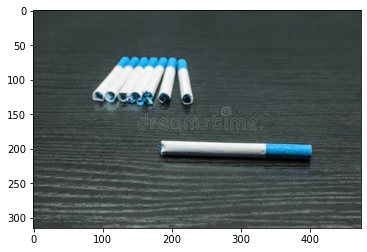

In [50]:
image_path = "c5.jpg"
image = cv2.imread(image_path)
plt.imshow(image);

In [90]:
pred

array([[0.9225259]], dtype=float32)

In [110]:
input_tensor = tf.convert_to_tensor(cig_im)
input_tensor = input_tensor[tf.newaxis, ...]
detections = model(input_tensor)

In [51]:
def count_cigarettes(detections):
    cigarette_count = 0
    for detection in detections['detection_scores'][0]:
        if detection > confidence_threshold:  # Adjust the threshold as needed
            cigarette_count += 1
    return cigarette_count

confidence_threshold = 0.25# Adjust the threshold as needed
cigarette_count = count_cigarettes(detections)

In [52]:
print("Number of cigarettes detected:", cigarette_count)

Number of cigarettes detected: 1


In [113]:
# Convert the image to grayscale
image = cig_im
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to obtain a binary image
_, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours of objects in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the cigarettes
mask = np.zeros_like(image)
cigarette_contours = []

# Iterate over the contours and filter out the ones that represent cigarettes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)

    # Filter based on aspect ratio and size
    if 0.2 < aspect_ratio < 5 and cv2.contourArea(contour) > 100:
        cigarette_contours.append(contour)
        cv2.drawContours(mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

# Apply the mask to the original image to isolate the cigarettes
cigarettes_only = cv2.bitwise_and(image, mask)

# Display the preprocessed image
cv2.imshow('Preprocessed Image', cigarettes_only)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [114]:
# Find contours of cigarettes in the preprocessed image
cigarette_contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a blank image for counting
counting_image = np.zeros_like(image)
cv2.drawContours(counting_image, cigarette_contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Count the number of cigarettes
cigarette_count = len(cigarette_contours)

# Display the counting image and show the count
cv2.imshow('Counting Image', counting_image)
print(f"Cigarette Count: {cigarette_count}")

cv2.waitKey(0)
cv2.destroyAllWindows()


Cigarette Count: 10
